In [113]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px

# подгрузим всё необходимое для работы с моделями
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_validate, GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, f1_score 
from sklearn.metrics import recall_score, precision_score, classification_report, precision_recall_curve

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import shap
shap.initjs()
from pickle import dump, load


from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from catboost import Pool



sns.set(style="whitegrid")
pd.set_option('display.max_columns', None) 

In [114]:
df_train = pd.read_csv('/kaggle/input/train-data/train.csv')
df_test = pd.read_csv('/kaggle/input/test-data/test.csv')


display(df_train.head(5))
display(df_train.info())
display(df_test.head(5))
display(df_test.info())

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


None

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,5,18888,1,154,85.0,130,80,1,1,0,0,1
1,6,19042,2,170,69.0,130,90,1,1,0,0,1
2,7,20432,1,160,70.0,120,75,1,1,0,0,0
3,10,18133,2,185,94.0,130,90,1,1,0,0,1
4,11,16093,2,170,76.0,120,80,1,1,0,0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           30000 non-null  int64  
 1   age          30000 non-null  int64  
 2   gender       30000 non-null  int64  
 3   height       30000 non-null  int64  
 4   weight       30000 non-null  float64
 5   ap_hi        30000 non-null  int64  
 6   ap_lo        30000 non-null  int64  
 7   cholesterol  30000 non-null  int64  
 8   gluc         30000 non-null  int64  
 9   smoke        30000 non-null  int64  
 10  alco         30000 non-null  int64  
 11  active       30000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 2.7 MB


None

In [115]:
df_train = df_train.drop_duplicates()
df_test = df_test.drop_duplicates()
display(df_train.info())
display(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           30000 non-null  int64  
 1   age          30000 non-null  int64  
 2   gender       30000 non-null  int64  
 3   height       30000 non-null  int64  
 4   weight       30000 non-null  float64
 5   ap_hi        30000 non-null  int64  
 6   ap_lo        30000 non-null  int64  
 7   cholesterol  30000 non-null  int64  
 8   gluc         30000 non-null  int64  
 9   smoke        30000 non-null  int64  
 10  alco         30000 non-null  int64  
 11  active       30000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 2.7 MB


None

In [116]:
df_train['ap_hi'], df_train['ap_lo'] = np.where(df_train['ap_hi'] < df_train['ap_lo'],
                                                (df_train['ap_lo'], df_train['ap_hi']),
                                                (df_train['ap_hi'], df_train['ap_lo']))
df_test['ap_hi'], df_test['ap_lo'] = np.where(df_test['ap_hi'] < df_test['ap_lo'],
                                                (df_test['ap_lo'], df_test['ap_hi']),
                                                (df_test['ap_hi'], df_test['ap_lo']))

In [117]:
df_train.isna().sum()
df_test.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
dtype: int64

In [118]:
df_train.age = df_train.age.abs()
df_test.age = df_test.age.abs()
df_train.age = df_train.age // 365
df_test.age = df_test.age // 365

In [119]:
df_train.age.unique()

array([50, 55, 51, 48, 47, 60, 61, 54, 40, 39, 45, 58, 59, 63, 64, 53, 49,
       57, 56, 46, 43, 62, 52, 42, 44, 41, 29, 30])

In [122]:
df_train["bmi"] = df_train.weight / df_train.height

In [123]:
df_train

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,0.369048
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,0.544872
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1,0.387879
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,0.485207
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0,0.358974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52,2,168,76.0,120,80,1,1,1,0,1,0,0.452381
69996,99995,61,1,158,126.0,140,90,2,2,0,0,1,1,0.797468
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1,0.573770
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1,0.441718


In [124]:
df_test["bmi"] = df_test.weight / df_test.height

In [125]:
df_test

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi
0,5,51,1,154,85.0,130,80,1,1,0,0,1,0.551948
1,6,52,2,170,69.0,130,90,1,1,0,0,1,0.405882
2,7,55,1,160,70.0,120,75,1,1,0,0,0,0.437500
3,10,49,2,185,94.0,130,90,1,1,0,0,1,0.508108
4,11,44,2,170,76.0,120,80,1,1,0,0,1,0.447059
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,99984,59,2,170,103.0,150,90,1,1,0,1,0,0.605882
29996,99987,50,1,172,78.0,110,70,1,1,0,0,1,0.453488
29997,99989,58,2,169,61.0,120,80,1,1,0,0,0,0.360947
29998,99994,39,2,175,80.0,120,80,2,1,0,0,0,0.457143


In [126]:
df_train.height.unique()

array([168, 156, 165, 169, 151, 157, 178, 158, 164, 173, 181, 172, 170,
       154, 162, 163, 153, 159, 166, 155, 160, 175, 171, 152, 187, 148,
       179, 180, 188, 185, 167, 183, 174, 176, 161, 184, 177, 182,  76,
       149, 142, 150, 144, 147, 186, 146, 141, 195, 140, 198, 145, 143,
       196, 138, 194, 190, 134, 136, 100, 120, 189, 137, 192, 122, 250,
       191, 117,  70,  97, 119, 130, 110, 193,  75, 132,  71, 135,  67,
       125, 139, 133,  74,  98, 112, 207,  68,  55,  81,  80,  64,  91,
        60, 109,  72, 197,  65, 128, 105, 108, 200, 104, 111, 113,  96,
       131,  59,  66,  99,  57])

In [127]:
df_train.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,52.840671,1.349571,164.359229,74.205690,143.385229,82.062471,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,0.451463
std,28851.302323,6.766774,0.476838,8.210126,14.395757,240.193736,13.642535,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,0.085722
min,0.000000,29.000000,1.000000,55.000000,10.000000,12.000000,-150.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.060606
25%,25006.750000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.393939
50%,50001.500000,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.436364
75%,74889.250000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.496774
max,99999.000000,64.000000,2.000000,250.000000,200.000000,16020.000000,220.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,2.240000


In [128]:
df_train.ap_hi = df_train.ap_hi.abs()
df_test.ap_hi = df_test.ap_hi.abs()
df_train.ap_lo = df_train.ap_lo.abs()
df_test.ap_lo = df_test.ap_lo.abs()

In [129]:
df_train.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,52.840671,1.349571,164.359229,74.205690,143.385229,82.088614,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,0.451463
std,28851.302323,6.766774,0.476838,8.210126,14.395757,240.193736,13.484336,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,0.085722
min,0.000000,29.000000,1.000000,55.000000,10.000000,12.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.060606
25%,25006.750000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.393939
50%,50001.500000,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.436364
75%,74889.250000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.496774
max,99999.000000,64.000000,2.000000,250.000000,200.000000,16020.000000,220.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,2.240000


In [130]:
df_train.loc[df_train['ap_hi'] > 5000, 'ap_hi'] //= 100
df_train.loc[(300 <= df_train['ap_hi']) & (df_train['ap_hi']  <= 4000), 'ap_hi'] //= 10
df_test.loc[df_test['ap_hi'] > 5000, 'ap_hi'] //= 100
df_test.loc[(300 <= df_train['ap_hi']) & (df_train['ap_hi']  <= 4000), 'ap_hi'] //= 10
df_train.loc[df_train['ap_lo'] > 5000, 'ap_lo'] //= 100
df_train.loc[(300 <= df_train['ap_lo']) & (df_train['ap_lo']  <= 4000), 'ap_lo'] //= 10
df_test.loc[df_test['ap_lo'] > 5000, 'ap_lo'] //= 100
df_test.loc[(300 <= df_train['ap_lo']) & (df_train['ap_lo']  <= 4000), 'ap_lo'] //= 10
df_train.loc[df_train['ap_lo'] <= 2, 'ap_lo'] *= 100
df_train.loc[(2 <= df_train['ap_lo']) & (df_train['ap_lo']<= 24), 'ap_lo'] *= 10
df_test.loc[df_test['ap_lo'] <= 2, 'ap_lo'] *= 100
df_test.loc[(2 <= df_train['ap_lo']) & (df_train['ap_lo']<= 24), 'ap_lo'] *= 10
df_train.loc[df_train['ap_hi'] <= 2, 'ap_hi'] *= 100
df_train.loc[(2 <= df_train['ap_hi']) & (df_train['ap_hi']<= 24), 'ap_hi'] *= 10
df_test.loc[df_test['ap_hi'] <= 2, 'ap_hi'] *= 100
df_test.loc[(2 <= df_train['ap_hi']) & (df_train['ap_hi']<= 24), 'ap_hi'] *= 10

In [131]:
df_train.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,52.840671,1.349571,164.359229,74.205690,126.222286,82.431900,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,0.451463
std,28851.302323,6.766774,0.476838,8.210126,14.395757,17.038821,13.279002,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,0.085722
min,0.000000,29.000000,1.000000,55.000000,10.000000,30.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.060606
25%,25006.750000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.393939
50%,50001.500000,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.436364
75%,74889.250000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.496774
max,99999.000000,64.000000,2.000000,250.000000,200.000000,240.000000,220.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,2.240000


In [132]:
df_test.loc[(df_test['weight']<= 17), 'weight'] *= 10

In [133]:
df_train.loc[(df_train['weight']<= 17), 'weight'] *= 10

In [134]:
df_train.loc[(df_train['height']<= 70), 'height'] += 100
df_test.loc[(df_test['height']<= 70), 'height'] += 100

In [135]:
df_test["bmi"] = df_test.weight / df_test.height
df_train["bmi"] = df_train.weight / df_train.height

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.


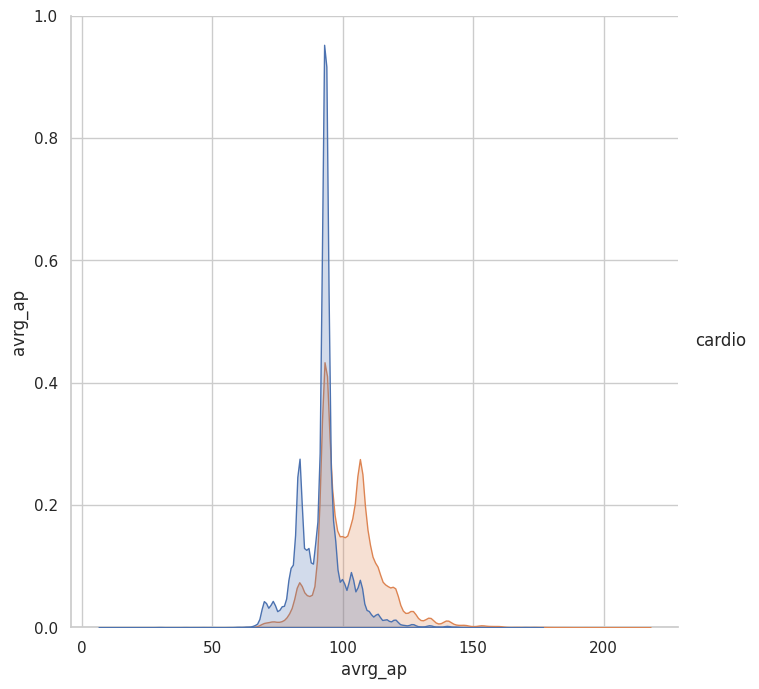

In [136]:
df_train['avrg_ap'] = np.round((2 * df_train['ap_lo'] + df_train['ap_hi']) / 3, 1)
df_test['avrg_ap'] = np.round((2 * df_test['ap_lo'] + df_test['ap_hi']) / 3, 1)
sns.pairplot(df_train[['avrg_ap', 'cardio']],  hue='cardio', height=7)

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.


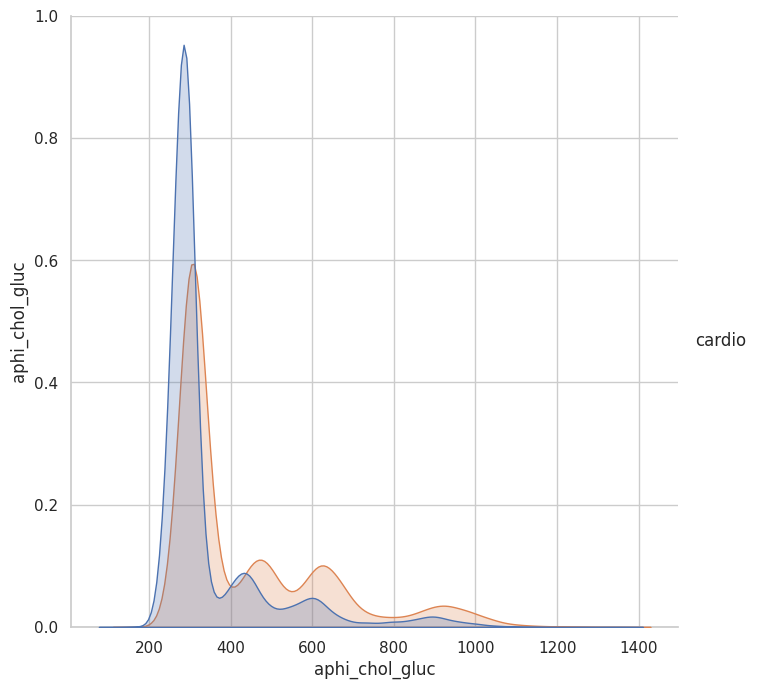

In [137]:
df_train['aphi_chol_gluc'] = (df_train['avrg_ap'] + df_train['age']) * (df_train['cholesterol'] + df_train['gluc'])
df_test['aphi_chol_gluc'] = (df_test['avrg_ap'] + df_test['age']) * (df_test['cholesterol'] + df_test['gluc'])
sns.pairplot(df_train[['aphi_chol_gluc', 'cardio']],  hue='cardio', height=7);

In [138]:
df_test

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi,avrg_ap,aphi_chol_gluc
0,5,51,1,154,85.0,130,80,1,1,0,0,1,0.551948,96.7,295.4
1,6,52,2,170,69.0,130,90,1,1,0,0,1,0.405882,103.3,310.6
2,7,55,1,160,70.0,120,75,1,1,0,0,0,0.437500,90.0,290.0
3,10,49,2,185,94.0,130,90,1,1,0,0,1,0.508108,103.3,304.6
4,11,44,2,170,76.0,120,80,1,1,0,0,1,0.447059,93.3,274.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,99984,59,2,170,103.0,150,90,1,1,0,1,0,0.605882,110.0,338.0
29996,99987,50,1,172,78.0,110,70,1,1,0,0,1,0.453488,83.3,266.6
29997,99989,58,2,169,61.0,120,80,1,1,0,0,0,0.360947,93.3,302.6
29998,99994,39,2,175,80.0,120,80,2,1,0,0,0,0.457143,93.3,396.9


In [139]:
df_train

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,avrg_ap,aphi_chol_gluc
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,0.369048,90.0,280.0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,0.544872,106.7,646.8
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1,0.387879,90.0,564.0
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,0.485207,116.7,329.4
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0,0.358974,73.3,240.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52,2,168,76.0,120,80,1,1,1,0,1,0,0.452381,93.3,290.6
69996,99995,61,1,158,126.0,140,90,2,2,0,0,1,1,0.797468,106.7,670.8
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1,0.573770,120.0,688.0
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1,0.441718,98.3,477.9


In [70]:
X = df_train.drop(['id', 'cardio'],axis=1)
y = df_train['cardio'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth = 4, random_seed=42)
model.fit(X_train, y_train, verbose=False)

In [140]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC Score: {roc_auc:.4f}')

Accuracy: 0.7386
Precision: 0.7578
Recall: 0.7028
F1 Score: 0.7293
ROC AUC Score: 0.8029


In [141]:
params = {'depth': [4, 7, 10],
             'learning_rate': [0.03, 0.1, 0.3],
             'l2_leaf_reg': [1, 3, 5]}

grid_search = GridSearchCV(model, param_grid=params, scoring='recall', cv=3)
grid_search.fit(X_train, y_train)


0:	learn: 0.6861339	total: 4.93ms	remaining: 488ms
1:	learn: 0.6796945	total: 9.69ms	remaining: 475ms
2:	learn: 0.6733485	total: 14.8ms	remaining: 480ms
3:	learn: 0.6673088	total: 20.6ms	remaining: 495ms
4:	learn: 0.6618221	total: 26.1ms	remaining: 496ms
5:	learn: 0.6564540	total: 30.6ms	remaining: 479ms
6:	learn: 0.6514954	total: 35.3ms	remaining: 468ms
7:	learn: 0.6467789	total: 40.1ms	remaining: 461ms
8:	learn: 0.6422312	total: 44.7ms	remaining: 452ms
9:	learn: 0.6378860	total: 49.1ms	remaining: 442ms
10:	learn: 0.6337934	total: 53.7ms	remaining: 435ms
11:	learn: 0.6299712	total: 58.4ms	remaining: 428ms
12:	learn: 0.6261793	total: 63.6ms	remaining: 425ms
13:	learn: 0.6228655	total: 68.4ms	remaining: 420ms
14:	learn: 0.6195757	total: 73.7ms	remaining: 418ms
15:	learn: 0.6163150	total: 78.4ms	remaining: 411ms
16:	learn: 0.6131713	total: 83.3ms	remaining: 407ms
17:	learn: 0.6102544	total: 87.7ms	remaining: 399ms
18:	learn: 0.6074900	total: 92.3ms	remaining: 394ms
19:	learn: 0.6047787	t

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x788978094820>,
             param_grid={'depth': [4, 7, 10], 'l2_leaf_reg': [1, 3, 5],
                         'learning_rate': [0.03, 0.1, 0.3]},
             scoring='recall')

In [142]:
best_params = grid_search.best_params_


In [143]:
best_model = CatBoostClassifier(**best_params)


In [144]:
best_model.fit(X_train, y_train)


0:	learn: 0.6165200	total: 14.3ms	remaining: 14.3s
1:	learn: 0.5813439	total: 31.7ms	remaining: 15.8s
2:	learn: 0.5633585	total: 46.8ms	remaining: 15.6s
3:	learn: 0.5528699	total: 60.3ms	remaining: 15s
4:	learn: 0.5475935	total: 74.1ms	remaining: 14.8s
5:	learn: 0.5438840	total: 91.4ms	remaining: 15.1s
6:	learn: 0.5415175	total: 106ms	remaining: 15s
7:	learn: 0.5395904	total: 122ms	remaining: 15.2s
8:	learn: 0.5385257	total: 141ms	remaining: 15.5s
9:	learn: 0.5375965	total: 159ms	remaining: 15.7s
10:	learn: 0.5367663	total: 175ms	remaining: 15.8s
11:	learn: 0.5362223	total: 189ms	remaining: 15.6s
12:	learn: 0.5356380	total: 205ms	remaining: 15.6s
13:	learn: 0.5351584	total: 221ms	remaining: 15.6s
14:	learn: 0.5347909	total: 239ms	remaining: 15.7s
15:	learn: 0.5344868	total: 255ms	remaining: 15.7s
16:	learn: 0.5338225	total: 271ms	remaining: 15.7s
17:	learn: 0.5334689	total: 284ms	remaining: 15.5s
18:	learn: 0.5331357	total: 301ms	remaining: 15.5s
19:	learn: 0.5328300	total: 315ms	remai

In [157]:
accuracy = best_model.score(X_test, y_test)
accuracy

0.7204285714285714

In [158]:
y_pred = best_model.predict(X_test)

report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.71      0.75      0.73      6988
           1       0.74      0.69      0.71      7012

    accuracy                           0.72     14000
   macro avg       0.72      0.72      0.72     14000
weighted avg       0.72      0.72      0.72     14000



In [159]:
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC Score: {roc_auc:.4f}')

Accuracy: 0.7204
Precision: 0.7371
Recall: 0.6868
F1 Score: 0.7111
ROC AUC Score: 0.7784


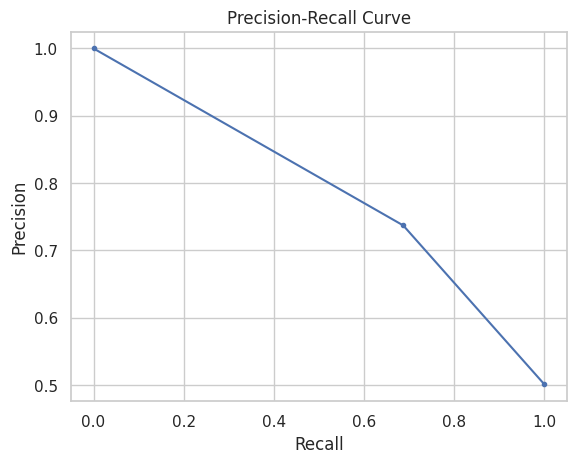

In [160]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# Построение графика precision-recall curve
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


In [161]:
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[5270 1718]
 [2196 4816]]


In [162]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Сat Accuracy: {accuracy:.4f}')
print(f'Cat Classification Report:\n{classification_report(y_test, y_pred)}')

Сat Accuracy: 0.7204
Cat Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.75      0.73      6988
           1       0.74      0.69      0.71      7012

    accuracy                           0.72     14000
   macro avg       0.72      0.72      0.72     14000
weighted avg       0.72      0.72      0.72     14000



In [163]:
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'XGBoost Accuracy: {accuracy:.4f}')
print(f'XGBoost Classification Report:\n{classification_report(y_test, y_pred)}')

XGBoost Accuracy: 0.7366
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.77      0.75      6988
           1       0.76      0.70      0.73      7012

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000



In [164]:
probabilities = xgb_model.predict_proba(X_test)[:, 1]

threshold = 0.5
while True:
    predictions = (probabilities > threshold).astype(int)
    recall = recall_score(y_test, predictions)
    if recall >= 0.9:
        break
    else:
        threshold -= 0.01



precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Accuracy: {accuracy}")
print(threshold)


Precision: 0.6099788502211113
Recall: 0.9048773531089561
Accuracy: 0.6625714285714286
0.2699999999999998


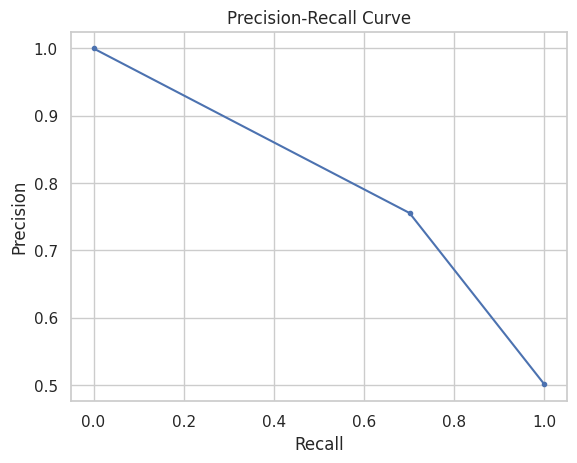

In [165]:
precision, recall, threshold = precision_recall_curve(y_test, y_pred)

# Построение графика precision-recall curve
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


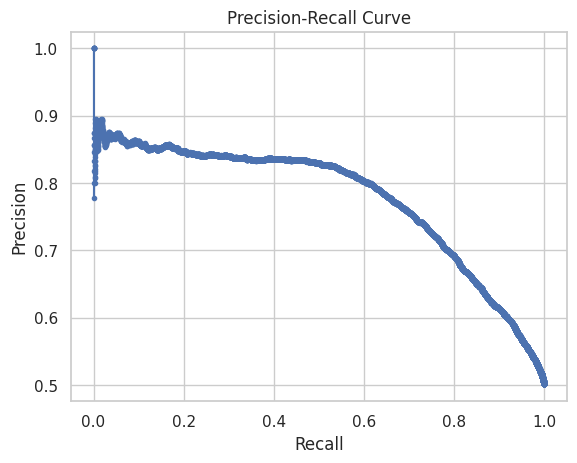

In [166]:
y_scores = xgb_model.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


In [167]:
y_pred = (y_scores > 0.5).astype(int) 
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[5398 1590]
 [2098 4914]]


In [172]:
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")

Recall: 0.9048773531089561
Precision: 0.6099788502211113
Accuracy: 0.6625714285714286


In [170]:
class_counts = df_train['cardio'].value_counts()


print(class_counts)


cardio
0    35021
1    34979
Name: count, dtype: int64


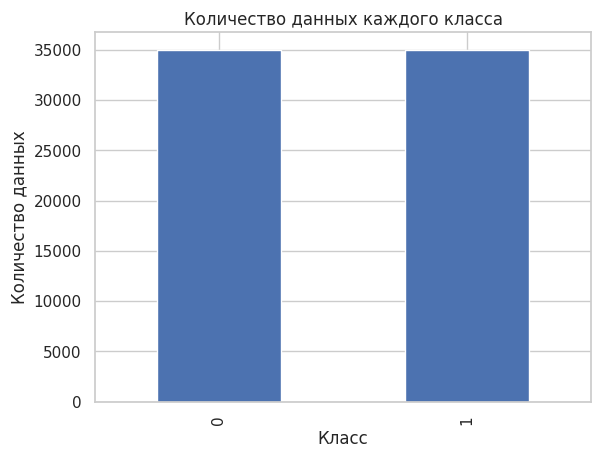

In [171]:
class_counts.plot.bar()
plt.xlabel('Класс')
plt.ylabel('Количество данных')
plt.title('Количество данных каждого класса')
plt.show()


In [173]:
df_train

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,avrg_ap,aphi_chol_gluc
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,0.369048,90.0,280.0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,0.544872,106.7,646.8
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1,0.387879,90.0,564.0
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,0.485207,116.7,329.4
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0,0.358974,73.3,240.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52,2,168,76.0,120,80,1,1,1,0,1,0,0.452381,93.3,290.6
69996,99995,61,1,158,126.0,140,90,2,2,0,0,1,1,0.797468,106.7,670.8
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1,0.573770,120.0,688.0
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1,0.441718,98.3,477.9


In [179]:
df_train = pd.read_csv('/kaggle/input/train-data/train.csv')
df_test = pd.read_csv('/kaggle/input/test-data/test.csv')

In [185]:
df_train = df_train.drop(df_train[df_train['weight'] > 200].index)
df_train = df_train.drop(df_train[df_train['weight'] < 50].index)
df_train = df_train.drop(df_train[df_train['height'] > 200].index)
df_train = df_train.drop(df_train[df_train['height'] < 100].index)
df_train = df_train.drop(df_train[df_train['ap_hi'] > 240].index)
df_train = df_train.drop(df_train[df_train['ap_hi'] < 50].index)
df_train = df_train.drop(df_train[df_train['ap_lo'] > 240].index)
df_train = df_train.drop(df_train[df_train['ap_lo'] < 50].index)

df_test = df_test.drop(df_test[df_test['weight'] > 200].index)
df_test = df_test.drop(df_test[df_test['weight'] < 50].index)
df_test = df_test.drop(df_test[df_test['height'] > 200].index)
df_test = df_test.drop(df_test[df_test['height'] < 100].index)
df_test = df_test.drop(df_test[df_test['ap_hi'] > 240].index)
df_test = df_test.drop(df_test[df_test['ap_hi'] < 50].index)
df_test = df_test.drop(df_test[df_test['ap_lo'] > 240].index)
df_test = df_test.drop(df_test[df_test['ap_lo'] < 50].index)

In [181]:
df_train.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,67752.000000,67752.000000,67752.000000,67752.000000,67752.000000,67752.000000,67752.000000,67752.000000,67752.000000,67752.000000,67752.000000,67752.000000,67752.000000
mean,49927.921006,19471.174725,1.352270,164.533268,74.534249,126.779519,81.485152,1.366203,1.227019,0.088514,0.054021,0.803032,0.498111
std,28840.263732,2464.009202,0.477681,7.907469,13.983163,16.695179,9.615785,0.680381,0.573162,0.284043,0.226060,0.397711,0.500000
min,0.000000,10798.000000,1.000000,100.000000,50.000000,70.000000,50.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,24938.750000,17673.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,49943.500000,19705.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74815.500000,21325.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,198.000000,200.000000,240.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [186]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67752 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           67752 non-null  int64  
 1   age          67752 non-null  int64  
 2   gender       67752 non-null  int64  
 3   height       67752 non-null  int64  
 4   weight       67752 non-null  float64
 5   ap_hi        67752 non-null  int64  
 6   ap_lo        67752 non-null  int64  
 7   cholesterol  67752 non-null  int64  
 8   gluc         67752 non-null  int64  
 9   smoke        67752 non-null  int64  
 10  alco         67752 non-null  int64  
 11  active       67752 non-null  int64  
 12  cardio       67752 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 7.2 MB


In [187]:
df_test["bmi"] = df_test.weight / (df_test.height * df_test.height)
df_train["bmi"] = df_train.weight / (df_train.height * df_train.height)

In [188]:
df_train['avrg_ap'] = np.round((2 * df_train['ap_lo'] + df_train['ap_hi']) / 3, 1) 
df_test['avrg_ap'] = np.round((2 * df_test['ap_lo'] + df_test['ap_hi']) / 3, 1)

In [189]:
df_train['aphi_chol_gluc'] = (df_train['avrg_ap'] + df_train['age']) * (df_train['cholesterol'] + df_train['gluc'])
df_test['aphi_chol_gluc'] = (df_test['avrg_ap'] + df_test['age']) * (df_test['cholesterol'] + df_test['gluc'])

In [190]:
xgb_model = XGBClassifier(random_state=123)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'XGBoost Accuracy: {accuracy:.4f}')
print(f'XGBoost Classification Report:\n{classification_report(y_test, y_pred)}')

XGBoost Accuracy: 0.7366
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.77      0.75      6988
           1       0.76      0.70      0.73      7012

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000

